#### 2) Implementar a regressão não-linear para o caso bi-dimensional, usando o conjunto gerado abaixo:

##### Pacotes

In [13]:
import numpy as np
import matplotlib.pyplot as plt

##### Dados

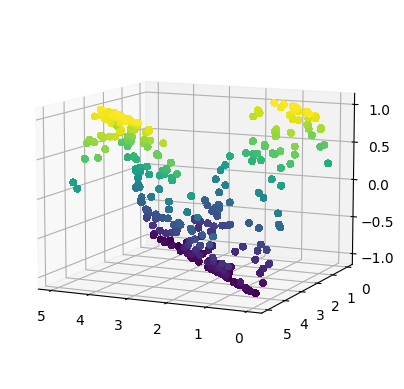

In [14]:
def pontos_2d(P):
    np.random.seed(1)
    X = [5*np.random.random_sample(P,),5*np.random.random_sample(P,)]
    X = np.array(X)
    Y = np.sin(X[0,:]+X[1,:]) #+ 0.2 * np.random.random_sample(P,)
    return X,Y

P = 300
[X,Y] = pontos_2d(P)
ax = plt.axes(projection='3d')
ax.view_init(10, 115)
for i in range(P):
    ax.scatter(X[0,:], X[1,:],Y, c=Y, cmap='viridis', linewidth=0.5)

##### Funções

In [15]:
def modelo(x, v, w):
    return w[0] + w[1]*np.sin(v[0] + v[1]*x[0] + v[2]*x[1])

def funcao_custo(X,Y,v,w):
    custo = 0
    for i in range(P):
        custo += (modelo(X[:,i],v,w) - Y[i])**2
    return custo / P

def gradiente_ponto_v(x,v,w):
    dv = np.array([1,x[0],x[1]])
    scalar = w[1] * np.cos(v[0] + v[1]*x[0] + v[2]*x[1])
    return scalar * dv

def gradiente_ponto_w(x,v): 
    return np.array([1, np.sin(v[0] + v[1]*x[0] + v[2]*x[1])])

def calcula_gradiente(X,Y,v,w):
    dv = np.zeros(3)
    dw = np.zeros(2)
    for i in range(P):
        dv += 2 * (modelo(X[:,i],v,w) - Y[i]) * gradiente_ponto_v(X[:,i], v, w)
        dw += 2 * (modelo(X[:,i],v,w) - Y[i]) * gradiente_ponto_w(X[:,i], v)
    dv = dv / P
    dw = dw / P
    return dv, dw

def gradiente_descendente(X,Y,v,w,alpha,iteracoes):
    custos = []
    for _ in range(iteracoes):
        dv, dw = calcula_gradiente(X,Y,v,w)
        v = v - alpha * dv
        w = w - alpha * dw
        custos.append(funcao_custo(X,Y,v,w))
    return v, w, custos

##### Main

In [16]:
# Parâmetros
alpha = 0.1
iteracoes = 1000
w = np.array([0.5, 0.5])
v = np.array([0.5, 0.5, 0.5])

# Cálculo
v, w, custos = gradiente_descendente(X, Y, v, w, alpha, iteracoes)

# Resultados
print("Custo: {}".format(custos[-1]))
print("Coeficiente pós otimização: {}".format(w))
print("V pós otimização: {}".format(v))

Custo: 1.0980379898656118e-11
Coeficiente pós otimização: [9.35491236e-07 9.99999668e-01]
V pós otimização: [1.35440598e-05 9.99997585e-01 9.99997559e-01]
